In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split  
from sklearn.svm import SVC  
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, log_loss

from sklearn.svm import SVC
from sklearn import decomposition

from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import StratifiedShuffleSplit

In [2]:
#data = pd.read_csv("baseline_data.csv").fillna(0)

In [3]:
#for column in data.columns:
#    if data[column].dtype == type(object):
#        le = preprocessing.LabelEncoder()
#        data[column] = le.fit_transform(data[column].astype(str))
#data.head()

In [4]:
#X = data.drop('DX.bl', axis=1)  
#y = data['DX.bl']  

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer, LabelEncoder, StandardScaler, scale
from sklearn.utils import resample

df = pd.read_csv('./baseline_data.csv',header=0, low_memory=False)
Catdata = df.loc[0:,'PTETHCAT':'APOE4'].join(df['PTGENDER']).join(df['imputed_genotype'])
Numdata = df.loc[0:,:'Thickness..thickinthehead..2035'].join(df['AGE']).join(df['PTEDUCAT']).join(df['MMSE'])
labels = df['DX.bl']

for i in Catdata.columns:
    the_value = str(Catdata[i].mode().values[0])
    Catdata[i].replace('NaN',the_value,inplace = True)
    dummy_data = pd.get_dummies(Catdata[i], prefix=i+"_", drop_first=True)
    Catdata = pd.concat([Catdata, dummy_data], axis=1)
    Catdata.drop(i, axis=1, inplace=True)

le = LabelEncoder()
le.fit(labels)
labels = le.transform(labels)
labels = labels.astype('float')



data = Numdata.join(Catdata)
data['labels'] = labels

from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = ([],[],[],[])
X_train, X_test, y_train, y_test = train_test_split(data.loc[:,:'imputed_genotype__True'], data['labels'], test_size = 0.2, random_state = 2018)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train))
X_test = scaler.transform(X_test)
X_train['labels'] = np.array(y_train)

from sklearn.utils import resample
Xs_train = []
Labels = []
for _ in range(5):
    d = resample(X_train,n_samples=502)
    Xs_train.append(d.iloc[:,:-1])
    Labels.append(d['labels'])
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
scaler.fit(data)
data = pd.DataFrame(scaler.transform(data))
#labels = pd.DataFrame(labels)

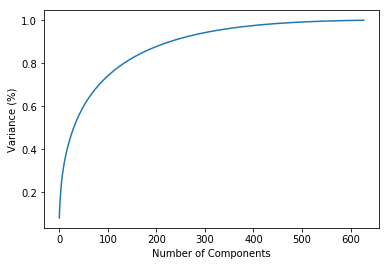

In [6]:
pca = PCA().fit(data)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
#plt.title('Diabetes Dataset Explained Variance')
plt.show()

In [7]:
pca = PCA(n_components=300)
dataset=pca.fit_transform(data)
principalDf = pd.DataFrame(data = dataset)

In [8]:
#X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2, random_state=0)  

In [9]:
#X_train, X_test, y_train, y_test = train_test_split(principalDf,labels,test_size=0.20,random_state=100)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 100)

In [ ]:
## Do Not Run This

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}
                   ]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(train_t, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()


# Tuning hyper-parameters for precision



In [46]:
#clf.best_params_

### Best parameters are C=10, kernel="linear" 

In [11]:
my_svm = SVC(C =10,kernel="linear", probability=True)
my_svm.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
predictions_train = my_svm.predict(X_train)
predictions_test = my_svm.predict(X_test)

In [13]:
print("Confusion Matrix for SVM on training dataset")
conf_matrix_train=confusion_matrix(y_train,predictions_train)
print(conf_matrix_train)
accuracy=accuracy_score(y_train, predictions_train)
f1_Score=f1_score(y_train, predictions_train, average='micro')
print("Accuracy of logit{}".format(accuracy))
print("F1 Score OF logit{}".format(f1_Score))

matrix_report=classification_report(y_train,predictions_train) 
print(matrix_report)

#print("ROC", roc_auc_score(y_train,predictions_train))

Confusion Matrix for SVM on training dataset
[[106   0   0]
 [  0 151   0]
 [  0   0 245]]
Accuracy of logit1.0
F1 Score OF logit1.0
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       106
        1.0       1.00      1.00      1.00       151
        2.0       1.00      1.00      1.00       245

avg / total       1.00      1.00      1.00       502



In [14]:
print("Confusion Matrix for SVM on Testing dataset")
conf_matrix_test=confusion_matrix(y_test,predictions_test)
print(conf_matrix_test)
accuracy=accuracy_score(y_test, predictions_test)
f1_Score=f1_score(y_test, predictions_test, average='micro')
print("Accuracy of logit{}".format(accuracy))
print("F1 Score OF logit {}".format(f1_Score))

matrix_report=classification_report(y_test,predictions_test) 
print(matrix_report)

#print("ROC",roc_auc_score(y_test,predictions_test))

Confusion Matrix for SVM on Testing dataset
[[19  1  7]
 [ 1 21 17]
 [ 3 11 46]]
Accuracy of logit0.6825396825396826
F1 Score OF logit 0.6825396825396826
             precision    recall  f1-score   support

        0.0       0.83      0.70      0.76        27
        1.0       0.64      0.54      0.58        39
        2.0       0.66      0.77      0.71        60

avg / total       0.69      0.68      0.68       126



In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
seed = 1075
np.random.seed(seed)
# Create SVM classifier

svc = SVC(C =10,kernel="linear", probability=True)
clf_array = [svc]
for clf in clf_array:
    vanilla_scores = cross_val_score(clf, data, labels, cv=10, n_jobs=-1)
    bagging_clf = BaggingClassifier(clf, 
       max_samples=0.4, max_features=10, random_state=seed)
    bagging_scores = cross_val_score(bagging_clf, data, labels, cv=10, 
       n_jobs=-1)
    
    print ("Mean of: {1:.3f}, std: (+/-) {2:.3f} [{0}]"  
                       .format(clf.__class__.__name__, 
                       vanilla_scores.mean(), vanilla_scores.std()))
    print ("Mean of: {1:.3f}, std: (+/-) {2:.3f} [Bagging {0}]\n"
                       .format(clf.__class__.__name__, 
                        bagging_scores.mean(), bagging_scores.std()))

Mean of: 0.699, std: (+/-) 0.056 [SVC]
Mean of: 0.486, std: (+/-) 0.003 [Bagging SVC]

